In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from IPython.display import display, HTML
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
!pip install pandas-profiling  sweetviz

     |████████████████████████████████| 15.1 MB 8.7 MB/s 


## Taller Final

Para desarrollar este taller escogimos un dataset de accidentes viales en la ciudad de Bogotá ocurridos en el 2018. Dicho dataset es de acceso publica gracias a la ley de datos abiertos de la alcaldia de Bogotá.






Cargue de dataset

In [3]:

from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [4]:
dfAccidentes=pd.read_csv('AccidentesViales20182.csv', encoding='latin-1')

In [5]:
dfAccidentes[dfAccidentes.columns[2:28]]

,Fecha,MES_PROCESADO,Oficina,GravedadCod,GravedadNombre,ClaseCodigo,ClaseNombre,ChoqueCodigo,ChoqueNombre,ObjetoFijoCodigo,...,TipoVia1,NumeroVia1,LetraVia1,CardinalVia1,TipoVia2,NumeroVia2,LetraVia2,CardinalVia2,Complemento,Municipio
0,3/05/2018,MAYO,11001000,2,Con Heridos,2,Atropello,NaN,NaN,NaN,...,CL,10,NaN,NaN,KR,37.0,A,NaN,2.0,BOGOTA D.C.
1,24/05/2018,MAYO,11001000,3,Solo Danos,1,Choque,1.0,Vehiculo,NaN,...,CL,100,NaN,NaN,KR,8.0,NaN,NaN,2.0,BOGOTA D.C.
2,29/06/2018,JUNIO,11001000,3,Solo Danos,1,Choque,1.0,Vehiculo,NaN,...,CL,17,NaN,NaN,KR,69.0,NaN,NaN,2.0,BOGOTA D.C.
3,29/06/2018,JUNIO,11001000,3,Solo Danos,1,Choque,1.0,Vehiculo,NaN,...,KR,14,NaN,NaN,CL,64.0,NaN,NaN,2.0,BOGOTA D.C.
4,27/04/2018,ABRIL,11001000,3,Solo Danos,1,Choque,1.0,Vehiculo,NaN,...,CL,13,NaN,NaN,KR,68.0,D,NaN,2.0,BOGOTA D.C.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36948,31/12/2018,DICIEMBRE,11001000,3,Solo Danos,1,Choque,1.0,Vehiculo,NaN,...,CL,52,NaN,S,KR,9.0,NaN,NaN,2.0,BOGOTA D.C.
36949,31/12/2018,DICIEMBRE,11001000,2,Con Heridos,1,Choque,1.0,Vehiculo,NaN,...,CL,70,A,NaN,KR,112.0,B,NaN,2.0,BOGOTA D.C.
36950,30/12/2018,DICIEMBRE,11001000,2,Con Heridos,1,Choque,4.0,Objeto Fijo,2.0,...,CL,65,NaN,S,KR,11.0,NaN,NaN,2.0,BOGOTA D.C.
36951,30/12/2018,DICIEMBRE,11001000,3,Solo Danos,1,Choque,1.0,Vehiculo,NaN,...,CL,59,NaN,NaN,KR,77.0,K,NaN,2.0,BOGOTA D.C.


Exploracion de variables

Validando de tipos de datos:

In [6]:
dfAccidentes.columns
dfAccidentes.dtypes
#dfAccidentes.head

idFormulario           int64
Dia                   object
Fecha                 object
MES_PROCESADO         object
Oficina                int64
GravedadCod            int64
GravedadNombre        object
ClaseCodigo            int64
ClaseNombre           object
ChoqueCodigo         float64
ChoqueNombre          object
ObjetoFijoCodigo     float64
ObjetoFijoNombre      object
OtraClase            float64
NombreOtraClase       object
Latitud              float64
Longitud             float64
Direccion             object
TipoVia1              object
NumeroVia1            object
LetraVia1             object
CardinalVia1          object
TipoVia2              object
NumeroVia2           float64
LetraVia2             object
CardinalVia2          object
Complemento          float64
Municipio             object
Localidad             object
FechaOcurrencia       object
HoraOcurrencia        object
HORA_PROCESADA         int64
Area                   int64
Sector                 int64
Zona          

In [7]:
dfAccidentes[dfAccidentes.columns[0:15]].describe(include='all')

,idFormulario,Dia,Fecha,MES_PROCESADO,Oficina,GravedadCod,GravedadNombre,ClaseCodigo,ClaseNombre,ChoqueCodigo,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase
count,36953.000000,36953,36953,36953,36953.0,36953.000000,36953,36953.000000,36953,31601.000000,31601,1148.000000,1148,130.000000,130
unique,NaN,7,365,12,NaN,NaN,3,NaN,6,NaN,5,NaN,15,NaN,4
top,NaN,VIERNES,11/05/2018,MAYO,NaN,NaN,Solo Danos,NaN,Choque,NaN,Vehiculo,NaN,Poste,NaN,Aprisionamiento
freq,NaN,5895,155,3309,NaN,NaN,23844,NaN,31601,NaN,30320,NaN,298,NaN,107
mean,18477.000000,NaN,NaN,NaN,11001000.0,2.631748,NaN,1.223717,NaN,1.122623,NaN,4.550523,NaN,3.715385,NaN
std,10667.556585,NaN,NaN,NaN,0.0,0.509565,NaN,0.651483,NaN,0.601102,NaN,3.488188,NaN,0.717820,NaN
min,1.000000,NaN,NaN,NaN,11001000.0,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN
25%,9239.000000,NaN,NaN,NaN,11001000.0,2.000000,NaN,1.000000,NaN,1.000000,NaN,2.000000,NaN,4.000000,NaN
50%,18477.000000,NaN,NaN,NaN,11001000.0,3.000000,NaN,1.000000,NaN,1.000000,NaN,3.000000,NaN,4.000000,NaN
75%,27715.000000,NaN,NaN,NaN,11001000.0,3.000000,NaN,1.000000,NaN,1.000000,NaN,8.000000,NaN,4.000000,NaN


In [8]:
dfAccidentes[dfAccidentes.columns[16:30]].describe(include='all')

,Longitud,Direccion,TipoVia1,NumeroVia1,LetraVia1,CardinalVia1,TipoVia2,NumeroVia2,LetraVia2,CardinalVia2,Complemento,Municipio,Localidad,FechaOcurrencia
count,36953.000000,36953,36953,36948,5747,2950,36948,36773.000000,11171,5063,36948.000000,36953,36953,36953
unique,NaN,24759,8,251,23,2,7,NaN,24,2,NaN,1,20,365
top,NaN,KR 80-CL 2 51,KR,AVENIDA BOYACA,A,S,CL,NaN,A,S,NaN,BOGOTA D.C.,KENNEDY,11/05/2018
freq,NaN,51,13512,2157,2148,2662,19666,NaN,4445,4765,NaN,36953,4005,155
mean,-20.038752,NaN,NaN,NaN,NaN,NaN,NaN,59.999755,NaN,NaN,8.026172,NaN,NaN,NaN
std,3852.081969,NaN,NaN,NaN,NaN,NaN,NaN,44.385739,NaN,NaN,17.435956,NaN,NaN,NaN
min,-740492.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,2.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN,2.000000,NaN,NaN,NaN
75%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,81.000000,NaN,NaN,2.000000,NaN,NaN,NaN


In [9]:
dfAccidentes[dfAccidentes.columns[31:50]].describe(include='all')

,HORA_PROCESADA,Area,Sector,Zona,TipoDisenno,TipoTiempo,ZonaTransito,AreaTransito,CON_BICICLETA,CON_CARGA,CON_EMBRIAGUEZ,CON_HUECOS,CON_MENORES,CON_MOTO,CON_PEATON,CON_PERSONA_MAYOR,CON_RUTAS,CON_TPI,CON_VELOCIDAD
count,36953.000000,36953.000000,36953.000000,36953.000000,36953,36953,36953,36953,36953,36953,36953,36953,36953,36953,36953,36953,36953,36953,36953
unique,NaN,NaN,NaN,NaN,12,12,4,11,2,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,Tramo de Via,Normal,ZONA 1,AREA 5,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
freq,NaN,NaN,NaN,NaN,30913,36098,13324,6850,34573,31705,36471,36714,35485,27649,32937,29499,36934,29800,36587
mean,12.858144,1.000541,1.540200,1.707520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.420563,0.023258,0.874585,1.531272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,13.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,17.000000,1.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Teniendo en cuenta la cantidad de registros por Clase de accidente, se decidio trabajar solo con accidentes tipo choque para que el dataset no quede desbalanceado:

In [10]:
print( dfAccidentes['ClaseCodigo'].value_counts())

1    31601
2     3759
4      920
3      537
6      130
5        6
Name: ClaseCodigo, dtype: int64


In [11]:
dfAccidentes.drop(dfAccidentes.loc[dfAccidentes["ClaseCodigo"] != 1].index, inplace=True)

Se eliminaran las siguientes variables teniendo en cuenta que hacen referencia a otras variables categoricas del dataset:



*   GravedadNombre = GravedadCod
*   ClaseNombre = ClaseCodigo
*   ChoqueNombre = ChoqueCodigo
*   ObjetoFijoNombre = ObjetoFijoCodigo
*   NombreOtraClase = OtraClase
*   HoraOcurrencia = HORA_PROCESADA


In [12]:
 dfAccidentes=dfAccidentes.drop(['GravedadNombre'], axis=1)
 dfAccidentes=dfAccidentes.drop(['ClaseNombre'], axis=1)
 dfAccidentes=dfAccidentes.drop(['ChoqueNombre'], axis=1)
 dfAccidentes=dfAccidentes.drop(['ObjetoFijoNombre'], axis=1)
 dfAccidentes=dfAccidentes.drop(['NombreOtraClase'], axis=1)
 dfAccidentes=dfAccidentes.drop(['HoraOcurrencia'], axis=1)


Se eliminan las siguientes variables ya que no aportan informacion al modelo:

*   idFormulario: identicador de cada accidente.
*   Oficina: Valor unico para todos los registros.
*   Municipio: Valor unico para todos los registros.
*   Latitud: Valor unico para todos los registros, excepto para un registro.
*   Longitud: Valor unico para todos los registros, excepto para un registro.
*   FechaOcurrencia y fecha: No nos aporta al modelo ya que no trabajaremos con series de tiempo.
*   ChoqueCodigo: variables con datos en muy pocos registros, ya que decidimos trabajar solo con choques.
*   ObjetoFijoCodigo: varables con datos en muy pocos registros, ya que decidimos trabajar solo con choques.
*   OtraClase: Valores nulos para todos los registros tipo choque
*   ClaseCodigo: Valor unico para todos los registros, ya que decidimos trabajar solo con choques.


Dado que las siguientes variables hacen referencia o describen una ubicación dentro del distrito de Bogotá se tomo la decisión de eliminarlas y tomar de referencia la variable Localidad como forma de ubicción: 

*   Direccion: 
*   TipoVia1
*   NumeroVia1
*   LetraVia1
*   CardinalVia1
*   TipoVia2
*   NumeroVia2
*   LetraVia2
*   CardinalVia2
*   Complemento
*   ZonaTransito
*   AreaTransito
*   Area
*   Sector
*   Zona






In [13]:
print("Oficina")
print(dfAccidentes['Oficina'].value_counts()  )
print("Municipio")
print( dfAccidentes['Municipio'].value_counts() )
print("Latitud")
print( dfAccidentes['Latitud'].value_counts() )
print("Longitud")
print( dfAccidentes['Longitud'].value_counts() )
print("ClaseCodigo")
print( dfAccidentes['ClaseCodigo'].value_counts())
print("ObjetoFijoCodigo")
print( dfAccidentes['ObjetoFijoCodigo'].value_counts())
print("OtraClase")
print( dfAccidentes['OtraClase'].value_counts())

Oficina
11001000    31601
Name: Oficina, dtype: int64
Municipio
BOGOTA D.C.    31601
Name: Municipio, dtype: int64
Latitud
0.0        31600
47319.0        1
Name: Latitud, dtype: int64
Longitud
 0.0         31600
-740492.0        1
Name: Longitud, dtype: int64
ClaseCodigo
1    31601
Name: ClaseCodigo, dtype: int64
ObjetoFijoCodigo
2.0     301
1.0     260
10.0    255
6.0     119
4.0      73
8.0      52
3.0      42
5.0      35
9.0       6
7.0       5
Name: ObjetoFijoCodigo, dtype: int64
OtraClase
Series([], Name: OtraClase, dtype: int64)


In [14]:
 dfAccidentes=dfAccidentes.drop(['idFormulario'], axis=1)
 dfAccidentes=dfAccidentes.drop(['Oficina'], axis=1)
 dfAccidentes=dfAccidentes.drop(['Municipio'], axis=1)
 dfAccidentes=dfAccidentes.drop(['Latitud'], axis=1)
 dfAccidentes=dfAccidentes.drop(['Longitud'], axis=1)
 dfAccidentes=dfAccidentes.drop(['ClaseCodigo'], axis=1)
 dfAccidentes=dfAccidentes.drop(['ObjetoFijoCodigo'], axis=1)
 dfAccidentes=dfAccidentes.drop(['OtraClase'], axis=1)
 dfAccidentes=dfAccidentes.drop(['Direccion'], axis=1)
 dfAccidentes=dfAccidentes.drop(['TipoVia1'], axis=1)
 dfAccidentes=dfAccidentes.drop(['NumeroVia1'], axis=1)
 dfAccidentes=dfAccidentes.drop(['LetraVia1'], axis=1)
 dfAccidentes=dfAccidentes.drop(['CardinalVia1'], axis=1)
 dfAccidentes=dfAccidentes.drop(['TipoVia2'], axis=1)
 dfAccidentes=dfAccidentes.drop(['NumeroVia2'], axis=1)
 dfAccidentes=dfAccidentes.drop(['LetraVia2'], axis=1)
 dfAccidentes=dfAccidentes.drop(['CardinalVia2'], axis=1)
 dfAccidentes=dfAccidentes.drop(['Complemento'], axis=1)
 dfAccidentes=dfAccidentes.drop(['ZonaTransito'], axis=1)
 dfAccidentes=dfAccidentes.drop(['AreaTransito'], axis=1)
 dfAccidentes=dfAccidentes.drop(['Area'], axis=1)
 dfAccidentes=dfAccidentes.drop(['Sector'], axis=1)
 dfAccidentes=dfAccidentes.drop(['Zona'], axis=1)
 dfAccidentes=dfAccidentes.drop(['Fecha'], axis=1)
 dfAccidentes=dfAccidentes.drop(['FechaOcurrencia'], axis=1)

In [15]:
dfAccidentes.columns

Index(['Dia', 'MES_PROCESADO', 'GravedadCod', 'ChoqueCodigo', 'Localidad',
       'HORA_PROCESADA', 'TipoDisenno', 'TipoTiempo', 'CON_BICICLETA',
       'CON_CARGA', 'CON_EMBRIAGUEZ', 'CON_HUECOS', 'CON_MENORES', 'CON_MOTO',
       'CON_PEATON', 'CON_PERSONA_MAYOR', 'CON_RUTAS', 'CON_TPI',
       'CON_VELOCIDAD'],
      dtype='object')

In [16]:
print( dfAccidentes['ChoqueCodigo'].value_counts())


1.0    30320
4.0     1148
5.0       89
3.0       31
2.0       13
Name: ChoqueCodigo, dtype: int64


# Identificando datos atipicos

Se identifican registros atípicos con un solo dato los cuales pueden llegar sesgar los datos de la variable, así que se eliminan los registros con menos de 11 repeticiones a excepción de niebla:

In [18]:
dfAccidentes.TipoTiempo.value_counts()

Normal           30838
Lluvia             698
Viento              31
Normal/Normal       11
Niebla              11
Granizo              7
Viento/Normal        1
Lluvia/Normal        1
Niebla/Normal        1
Viento/Lluvia        1
Normal/Viento        1
Name: TipoTiempo, dtype: int64

In [19]:
dfAccidentes.drop(dfAccidentes.loc[dfAccidentes["TipoTiempo"] == 'Normal/Normal'].index, inplace=True)
dfAccidentes.drop(dfAccidentes.loc[dfAccidentes["TipoTiempo"] == 'Normal/Viento'].index, inplace=True)
dfAccidentes.drop(dfAccidentes.loc[dfAccidentes["TipoTiempo"] == 'Viento/Normal'].index, inplace=True)
dfAccidentes.drop(dfAccidentes.loc[dfAccidentes["TipoTiempo"] == 'Lluvia/Normal'].index, inplace=True)
dfAccidentes.drop(dfAccidentes.loc[dfAccidentes["TipoTiempo"] == 'Niebla/Normal'].index, inplace=True)
dfAccidentes.drop(dfAccidentes.loc[dfAccidentes["TipoTiempo"] == 'Viento/Lluvia'].index, inplace=True)
dfAccidentes.drop(dfAccidentes.loc[dfAccidentes["TipoTiempo"] == 'Lluvia/Lluvia'].index, inplace=True)

#Encodificacion de campos

Teniendo en cuenta que se eliminaron  algunas variables categóricas y se dejaron las variables con sus respectivos códigos, a continuación, relacionamos el diccionario de datos de dichas variables:

Gravedad Codigo

1=Con Muertos

2=Con Heridos

3=Solo Daños
 
Choque Codigo

1=Vehiculo

2=Tren

3=Semoviente

4=Objeto Fijo

5=Otro
 


In [17]:
dfAccidentes['GravedadCod'].unique()
dfAccidentes['GravedadCod']=dfAccidentes['GravedadCod'].astype('category')
dfAccidentes['ChoqueCodigo']=dfAccidentes['ChoqueCodigo'].astype('category')
dfAccidentes.dtypes

Dia                    object
MES_PROCESADO          object
GravedadCod          category
ChoqueCodigo         category
Localidad              object
HORA_PROCESADA          int64
TipoDisenno            object
TipoTiempo             object
CON_BICICLETA          object
CON_CARGA              object
CON_EMBRIAGUEZ         object
CON_HUECOS             object
CON_MENORES            object
CON_MOTO               object
CON_PEATON             object
CON_PERSONA_MAYOR      object
CON_RUTAS              object
CON_TPI                object
CON_VELOCIDAD          object
dtype: object


Teniendo en cuenta que tenemos varias variables cuya informacion esta en formato texto las encodificaremos para facilirar su procesamiento.
Para las siguientes variables 0 representa "No"  y 1 representa "Si":



*   CON_BICICLETA
*   CON_CARGA
*   CON_EMBRIAGUEZ
*   CON_HUECOS
*   CON_MENORES
*   CON_MOTO
*   CON_PEATON
*   CON_PERSONA_MAYOR
*   CON_RUTAS
*   CON_TPI
*   CON_VELOCIDAD

In [20]:
dfAccidentes['CON_BICICLETA'] = dfAccidentes['CON_BICICLETA'].replace('NO',0)
dfAccidentes['CON_BICICLETA'] = dfAccidentes['CON_BICICLETA'].replace('SI',1)

dfAccidentes['CON_CARGA'] = dfAccidentes['CON_CARGA'].replace('NO',0)
dfAccidentes['CON_CARGA'] = dfAccidentes['CON_CARGA'].replace('SI',1)

dfAccidentes['CON_EMBRIAGUEZ'] = dfAccidentes['CON_EMBRIAGUEZ'].replace('NO',0)
dfAccidentes['CON_EMBRIAGUEZ'] = dfAccidentes['CON_EMBRIAGUEZ'].replace('SI',1)

dfAccidentes['CON_HUECOS'] = dfAccidentes['CON_HUECOS'].replace('NO',0)
dfAccidentes['CON_HUECOS'] = dfAccidentes['CON_HUECOS'].replace('SI',1)

dfAccidentes['CON_MENORES'] = dfAccidentes['CON_MENORES'].replace('NO',0)
dfAccidentes['CON_MENORES'] = dfAccidentes['CON_MENORES'].replace('SI',1)

dfAccidentes['CON_MOTO'] = dfAccidentes['CON_MOTO'].replace('NO',0)
dfAccidentes['CON_MOTO'] = dfAccidentes['CON_MOTO'].replace('SI',1)

dfAccidentes['CON_PEATON'] = dfAccidentes['CON_PEATON'].replace('NO',0)
dfAccidentes['CON_PEATON'] = dfAccidentes['CON_PEATON'].replace('SI',1)

dfAccidentes['CON_PERSONA_MAYOR'] = dfAccidentes['CON_PERSONA_MAYOR'].replace('NO',0)
dfAccidentes['CON_PERSONA_MAYOR'] = dfAccidentes['CON_PERSONA_MAYOR'].replace('SI',1)

dfAccidentes['CON_RUTAS'] = dfAccidentes['CON_RUTAS'].replace('NO',0)
dfAccidentes['CON_RUTAS'] = dfAccidentes['CON_RUTAS'].replace('SI',1)

dfAccidentes['CON_TPI'] = dfAccidentes['CON_TPI'].replace('NO',0)
dfAccidentes['CON_TPI'] = dfAccidentes['CON_TPI'].replace('SI',1)

dfAccidentes['CON_VELOCIDAD'] = dfAccidentes['CON_VELOCIDAD'].replace('NO',0)
dfAccidentes['CON_VELOCIDAD'] = dfAccidentes['CON_VELOCIDAD'].replace('SI',1)


In [21]:
dfAccidentes[dfAccidentes.columns[8:19]]

,CON_BICICLETA,CON_CARGA,CON_EMBRIAGUEZ,CON_HUECOS,CON_MENORES,CON_MOTO,CON_PEATON,CON_PERSONA_MAYOR,CON_RUTAS,CON_TPI,CON_VELOCIDAD
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
36948,0,0,0,0,0,0,0,0,0,0,0
36949,1,0,0,0,0,1,0,0,0,0,0
36950,0,0,0,0,0,0,0,1,0,0,0
36951,0,0,0,0,0,1,0,1,0,0,0


In [22]:
print("CON_BICICLETA")
print( dfAccidentes['CON_BICICLETA'].value_counts())
print("CON_CARGA")
print( dfAccidentes['CON_CARGA'].value_counts())
print("CON_EMBRIAGUEZ")
print( dfAccidentes['CON_EMBRIAGUEZ'].value_counts())
print("CON_HUECOS")
print( dfAccidentes['CON_HUECOS'].value_counts())
print("CON_MENORES")
print( dfAccidentes['CON_MENORES'].value_counts())
print("CON_MOTO")
print( dfAccidentes['CON_MOTO'].value_counts())
print("CON_PEATON")
print( dfAccidentes['CON_PEATON'].value_counts())
print("CON_PERSONA_MAYOR")
print( dfAccidentes['CON_PERSONA_MAYOR'].value_counts())
print("CON_RUTAS")
print( dfAccidentes['CON_RUTAS'].value_counts())
print("CON_TPI")
print( dfAccidentes['CON_TPI'].value_counts())
print("CON_VELOCIDAD")
print( dfAccidentes['CON_VELOCIDAD'].value_counts())

CON_BICICLETA
0    29378
1     2207
Name: CON_BICICLETA, dtype: int64
CON_CARGA
0    26521
1     5064
Name: CON_CARGA, dtype: int64
CON_EMBRIAGUEZ
0    31183
1      402
Name: CON_EMBRIAGUEZ, dtype: int64
CON_HUECOS
0    31460
1      125
Name: CON_HUECOS, dtype: int64
CON_MENORES
0    30719
1      866
Name: CON_MENORES, dtype: int64
CON_MOTO
0    24263
1     7322
Name: CON_MOTO, dtype: int64
CON_PEATON
0    31300
1      285
Name: CON_PEATON, dtype: int64
CON_PERSONA_MAYOR
0    26028
1     5557
Name: CON_PERSONA_MAYOR, dtype: int64
CON_RUTAS
0    31566
1       19
Name: CON_RUTAS, dtype: int64
CON_TPI
0    24811
1     6774
Name: CON_TPI, dtype: int64
CON_VELOCIDAD
0    31332
1      253
Name: CON_VELOCIDAD, dtype: int64


Teniendo en cuenta la cantidad de datos y la carga de procesamiento que representa, tambien se decidió encodificar las siguientes variables:

*   Localidad: se ajustaron los datos de la siguiente forma:
  0: 'ANTONIO NARINO', 

  1: 'BARRIOS UNIDOS',

   2: 'BOSA',

   3: 'CANDELARIA',

 4: 'CHAPINERO',

 5: 'CIUDAD BOLIVAR',

 6: 'ENGATIVA',

 7: 'FONTIBON',

 8: 'KENNEDY',

 9: 'LOS MARTIRES',

 10: 'PUENTE ARANDA',

 11: 'RAFAEL URIBE URIBE',

 12: 'SAN CRISTOBAL',

 13: 'SANTA FE',

 14: 'SUBA',

 15: 'SUMAPAZ',

 16: 'TEUSAQUILLO',

 17: 'TUNJUELITO',

 18: 'USAQUEN',

 19: 'USME'

*   TipoDisenno: Se ajustaron los datos de la siguiente forma:

  0: 'Cicloruta',

  1: 'Glorieta',
  
  2: 'Interseccion',

  3: 'Lote o predio',

  4: 'Paso a nivel',

  5: 'Paso elevado',

  6: 'Paso inferior',

  7: 'Ponton',

  8: 'Puente',

  9: 'Tramo de Via',

  10: 'Tunel',

  11: 'Via peatonal'

*   TipoTiempo:
  0: 'Granizo',

  1: 'Lluvia', 

  2: 'Niebla', 

  3: 'Normal', 

  4: 'Viento'

*   Dia:

   'LUNES': 1,  

   'MARTES': 2, 

   'MIERCOLES': 3, 

   'JUEVES': 4, 

   'VIERNES': 5, 

   'SABADO': 6, 

   'DOMINGO':7

*   MES_PROCESADO:

   'ENERO': 1,

   'FEBRERO': 2, 

   'MARZO': 3, 

   'ABRIL': 4, 

   'MAYO': 5, 

   'JUNIO': 6, 

   'JULIO':7, 

   'AGOSTO': 8, 

   'SEPTIEMBRE': 9, 

   'OCTUBRE': 10, 

   'NOVIEMBRE': 11, 

   'DICIEMBRE': 12

*   HORA_PROCESADA: Se asignaron rangos de horas para interpretar mejor los datos:

   1 (Mañana) =horas de 6 a 13

   2 (Tarde) =horas de 14 a 21

   3 (Noche) =horas de 22 a 24 y 0 a 5






In [23]:
print(dfAccidentes.Dia.unique())
print(dfAccidentes.MES_PROCESADO.unique())
print(dfAccidentes.Localidad.unique())
print(dfAccidentes.TipoDisenno.unique())
print(dfAccidentes.TipoTiempo.unique())

['JUEVES' 'VIERNES' 'SABADO' 'LUNES' 'MIERCOLES' 'MARTES' 'DOMINGO']
['MAYO' 'JUNIO' 'ABRIL' 'ENERO' 'FEBRERO' 'OCTUBRE' 'MARZO' 'JULIO'
 'AGOSTO' 'SEPTIEMBRE' 'DICIEMBRE' 'NOVIEMBRE']
['USAQUEN' 'FONTIBON' 'BARRIOS UNIDOS' 'TUNJUELITO' 'SANTA FE' 'ENGATIVA'
 'CHAPINERO' 'LOS MARTIRES' 'SUBA' 'RAFAEL URIBE URIBE' 'USME'
 'CIUDAD BOLIVAR' 'BOSA' 'KENNEDY' 'SAN CRISTOBAL' 'PUENTE ARANDA'
 'TEUSAQUILLO' 'ANTONIO NARINO' 'CANDELARIA' 'SUMAPAZ']
['Tramo de Via' 'Interseccion' 'Glorieta' 'Paso elevado' 'Puente'
 'Via peatonal' 'Cicloruta' 'Lote o predio' 'Paso a nivel' 'Paso inferior'
 'Tunel' 'Ponton']
['Normal' 'Lluvia' 'Granizo' 'Viento' 'Niebla']


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dfAccidentes['Localidad'] = encoder.fit_transform(dfAccidentes['Localidad'])

DiccionarioLocalidades = {index : label for index, label in enumerate(encoder.classes_)}

DiccionarioLocalidades

{0: 'ANTONIO NARINO',
 1: 'BARRIOS UNIDOS',
 2: 'BOSA',
 3: 'CANDELARIA',
 4: 'CHAPINERO',
 5: 'CIUDAD BOLIVAR',
 6: 'ENGATIVA',
 7: 'FONTIBON',
 8: 'KENNEDY',
 9: 'LOS MARTIRES',
 10: 'PUENTE ARANDA',
 11: 'RAFAEL URIBE URIBE',
 12: 'SAN CRISTOBAL',
 13: 'SANTA FE',
 14: 'SUBA',
 15: 'SUMAPAZ',
 16: 'TEUSAQUILLO',
 17: 'TUNJUELITO',
 18: 'USAQUEN',
 19: 'USME'}

In [25]:
dfAccidentes['TipoDisenno'] = encoder.fit_transform(dfAccidentes['TipoDisenno'])

DiccionarioTipoDisenno = {index : label for index, label in enumerate(encoder.classes_)}

DiccionarioTipoDisenno

{0: 'Cicloruta',
 1: 'Glorieta',
 2: 'Interseccion',
 3: 'Lote o predio',
 4: 'Paso a nivel',
 5: 'Paso elevado',
 6: 'Paso inferior',
 7: 'Ponton',
 8: 'Puente',
 9: 'Tramo de Via',
 10: 'Tunel',
 11: 'Via peatonal'}

In [26]:
dfAccidentes['TipoTiempo'] = encoder.fit_transform(dfAccidentes['TipoTiempo'])

DiccionarioTipoTiempo = {index : label for index, label in enumerate(encoder.classes_)}

DiccionarioTipoTiempo

{0: 'Granizo', 1: 'Lluvia', 2: 'Niebla', 3: 'Normal', 4: 'Viento'}

In [27]:
#Se usara una variable tipo diccionario para asingar valores especificos a cada valor de las siguientes variables:
cleanup_nums = {"Dia": {"LUNES": 1, "MARTES": 2, "MIERCOLES": 3, "JUEVES": 4, "VIERNES": 5, "SABADO": 6, "DOMINGO":7 },
                "MES_PROCESADO": {"ENERO": 1, "FEBRERO": 2, "MARZO": 3, "ABRIL": 4, "MAYO": 5, "JUNIO": 6, "JULIO":7, "AGOSTO": 8, "SEPTIEMBRE": 9, "OCTUBRE": 10, "NOVIEMBRE": 11, "DICIEMBRE": 12  },
                "HORA_PROCESADA": {0: 3,1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 1, 7:1, 8: 1, 9: 1, 10: 1, 11: 1,12: 1, 13: 1, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 3, 23: 3, 24: 3 }}

In [28]:
dfAccidentes = dfAccidentes.replace(cleanup_nums)

In [29]:
dfAccidentes['HORA_PROCESADA'].value_counts()

1    14613
2    13009
3     3963
Name: HORA_PROCESADA, dtype: int64

Teniendo en cuenta que se realizo la encodificacion, se procede a convertir los campos a categoricos

In [30]:
dfAccidentes['TipoDisenno']=dfAccidentes['TipoDisenno'].astype('category')
dfAccidentes['Dia']=dfAccidentes['Dia'].astype('category')
dfAccidentes['MES_PROCESADO']=dfAccidentes['MES_PROCESADO'].astype('category')
dfAccidentes['Localidad']=dfAccidentes['Localidad'].astype('category')
dfAccidentes['TipoTiempo']=dfAccidentes['TipoTiempo'].astype('category')
dfAccidentes['HORA_PROCESADA']=dfAccidentes['HORA_PROCESADA'].astype('category')
dfAccidentes.dtypes

Dia                  category
MES_PROCESADO        category
GravedadCod          category
ChoqueCodigo         category
Localidad            category
HORA_PROCESADA       category
TipoDisenno          category
TipoTiempo           category
CON_BICICLETA           int64
CON_CARGA               int64
CON_EMBRIAGUEZ          int64
CON_HUECOS              int64
CON_MENORES             int64
CON_MOTO                int64
CON_PEATON              int64
CON_PERSONA_MAYOR       int64
CON_RUTAS               int64
CON_TPI                 int64
CON_VELOCIDAD           int64
dtype: object

In [32]:
dfAccidentes[dfAccidentes.columns[0:19]]

,Dia,MES_PROCESADO,GravedadCod,ChoqueCodigo,Localidad,HORA_PROCESADA,TipoDisenno,TipoTiempo,CON_BICICLETA,CON_CARGA,CON_EMBRIAGUEZ,CON_HUECOS,CON_MENORES,CON_MOTO,CON_PEATON,CON_PERSONA_MAYOR,CON_RUTAS,CON_TPI,CON_VELOCIDAD
1,4,5,3,1.0,18,1,9,3,0,1,0,0,0,0,0,0,0,0,0
2,5,6,3,1.0,7,2,2,3,0,0,0,0,0,0,0,0,0,0,0
3,5,6,3,1.0,1,2,2,3,0,0,0,0,0,0,0,0,0,0,0
4,5,4,3,1.0,7,2,9,3,0,0,0,0,0,0,0,0,0,1,0
5,4,1,3,1.0,17,2,2,3,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36948,1,12,3,1.0,17,2,2,3,0,0,0,0,0,0,0,0,0,0,0
36949,1,12,2,1.0,6,1,9,3,1,0,0,0,0,1,0,0,0,0,0
36950,7,12,2,4.0,19,3,9,3,0,0,0,0,0,0,0,1,0,0,0
36951,7,12,3,1.0,2,3,9,3,0,0,0,0,0,1,0,1,0,0,0


In [33]:
dfAccidentes.describe(include='all')

,Dia,MES_PROCESADO,GravedadCod,ChoqueCodigo,Localidad,HORA_PROCESADA,TipoDisenno,TipoTiempo,CON_BICICLETA,CON_CARGA,CON_EMBRIAGUEZ,CON_HUECOS,CON_MENORES,CON_MOTO,CON_PEATON,CON_PERSONA_MAYOR,CON_RUTAS,CON_TPI,CON_VELOCIDAD
count,31585.0,31585.0,31585.0,31585.0,31585.0,31585.0,31585.0,31585.0,31585.000000,31585.000000,31585.000000,31585.000000,31585.000000,31585.000000,31585.000000,31585.000000,31585.000000,31585.000000,31585.000000
unique,7.0,12.0,3.0,5.0,20.0,3.0,12.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,5.0,3.0,3.0,1.0,18.0,1.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5060.0,2884.0,23703.0,30305.0,3484.0,14613.0,26002.0,30838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069875,0.160329,0.012728,0.003958,0.027418,0.231819,0.009023,0.175938,0.000602,0.214469,0.008010
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254940,0.366917,0.112098,0.062786,0.163301,0.422001,0.094563,0.380773,0.024520,0.410460,0.089142
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#Exploracion de datos 

Teniendo en cuenta que todas nuestras variables son categoricas, exploraremos los datos con sweetviz, para validar proporciones

                                             |          | [  0%]   00:00 -> (? left)


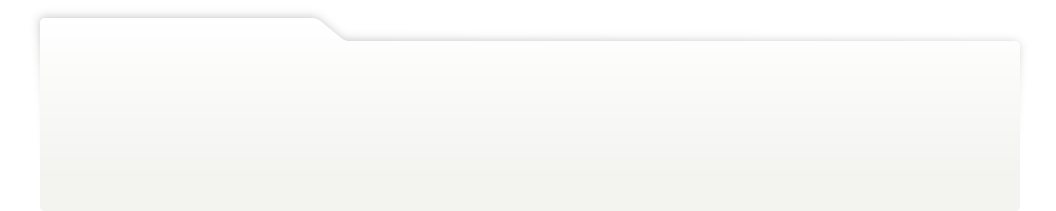
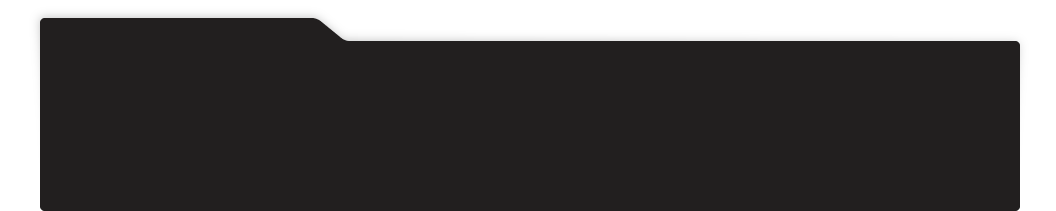
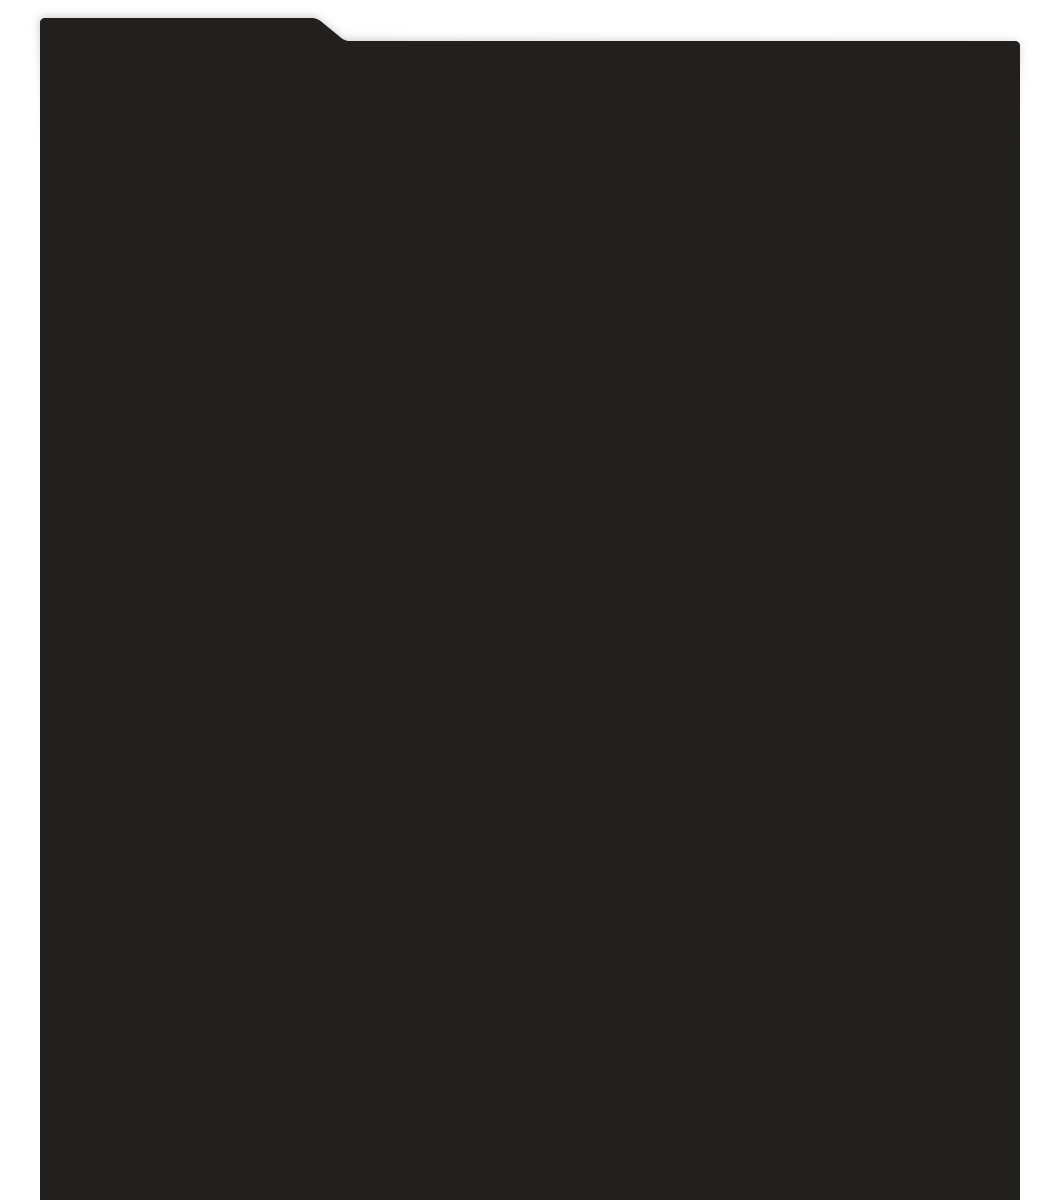
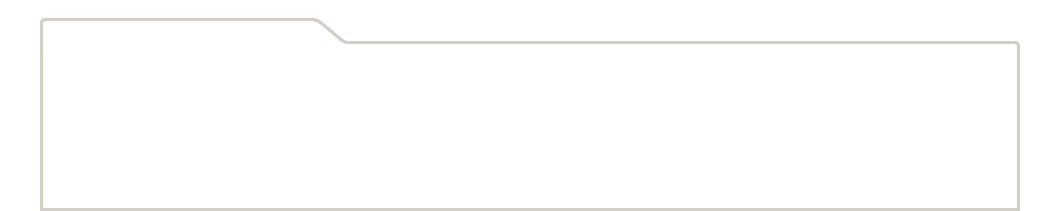
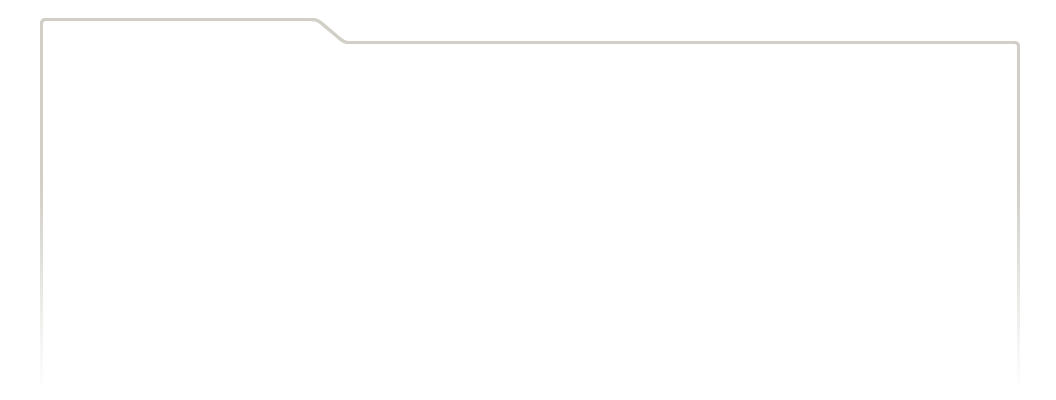
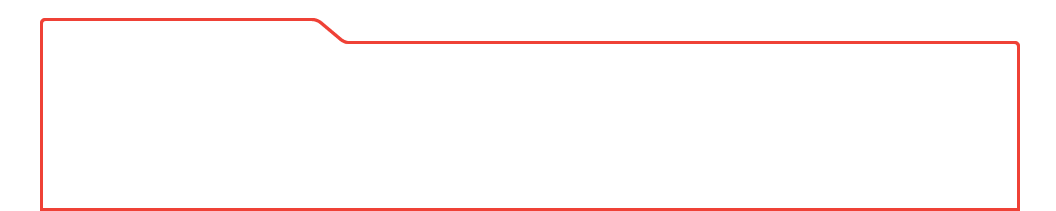
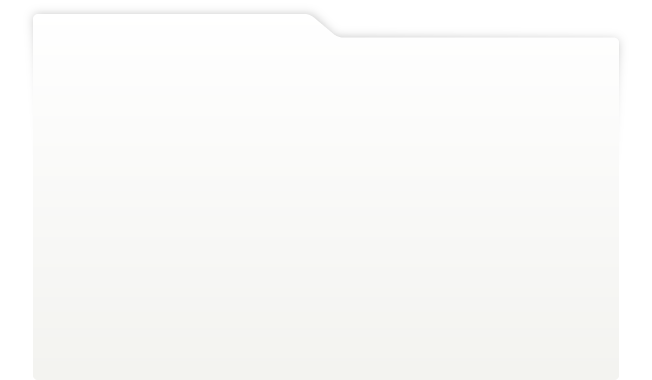
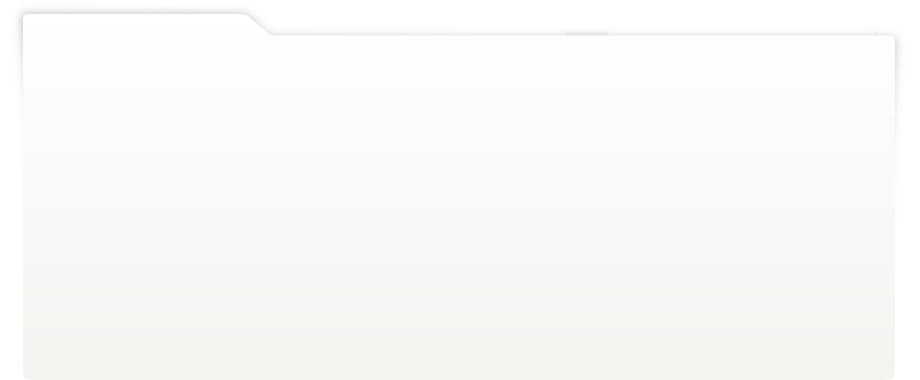
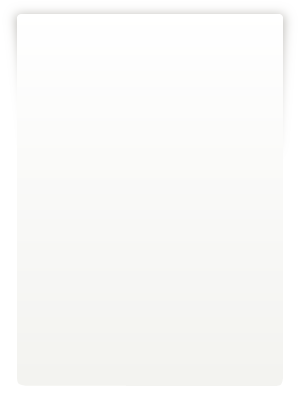
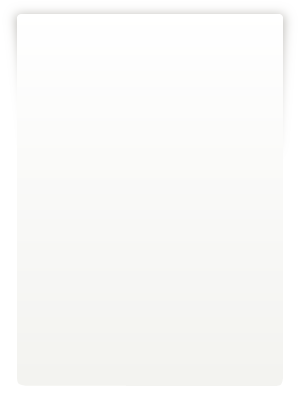
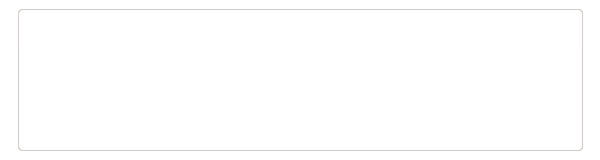
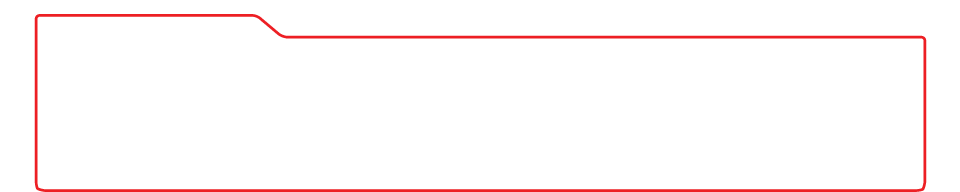
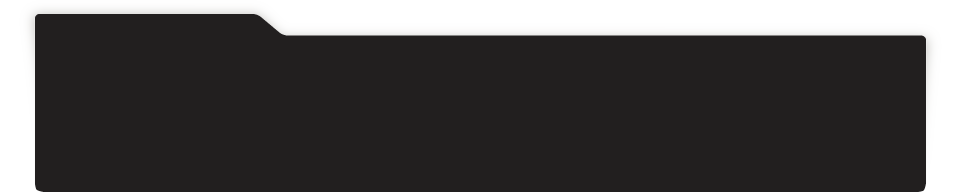
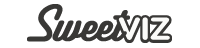
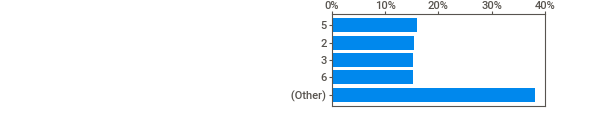
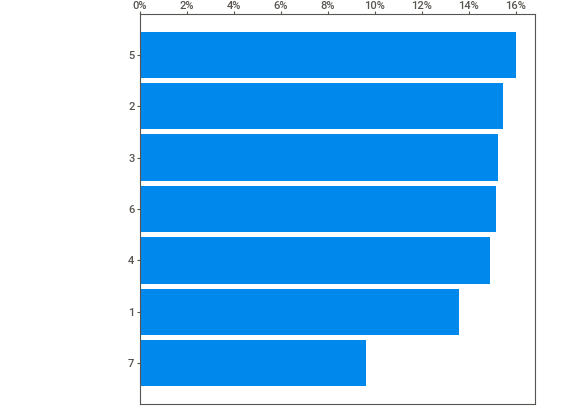
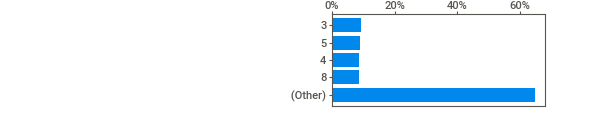
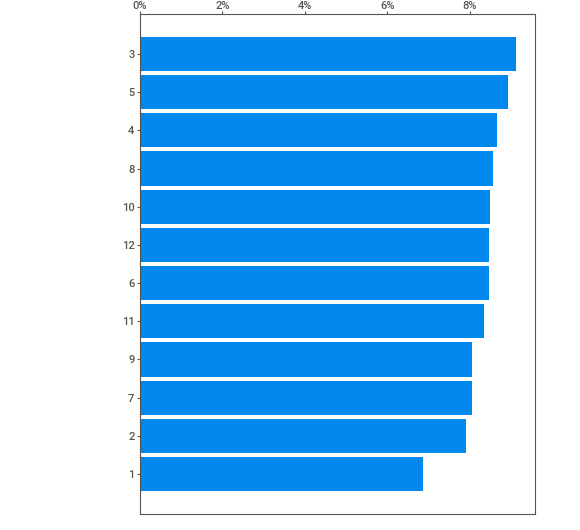
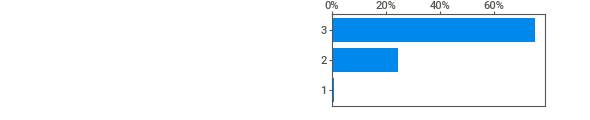
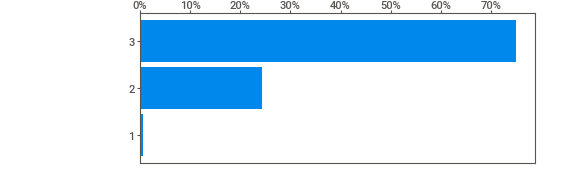
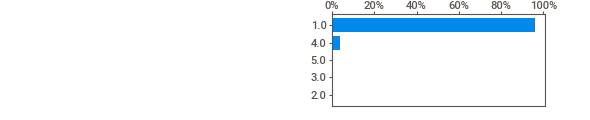
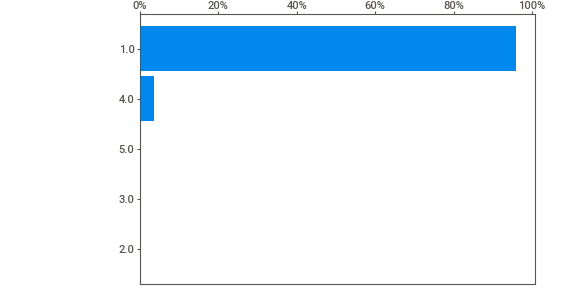
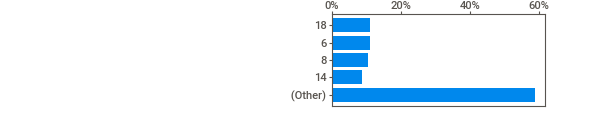
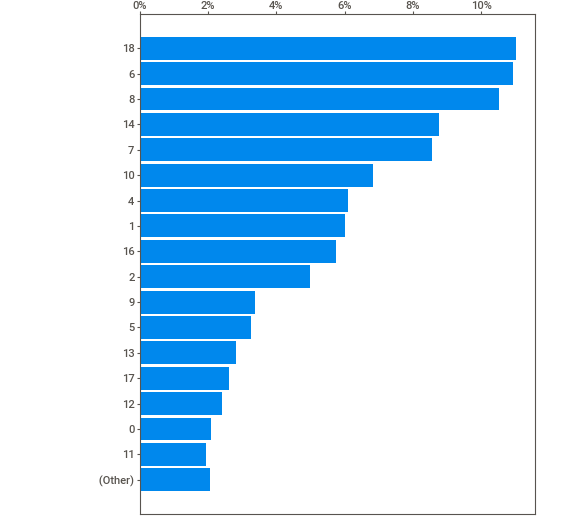
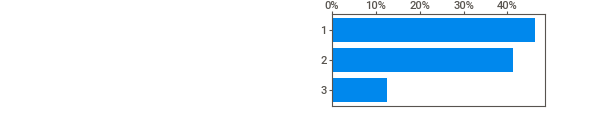
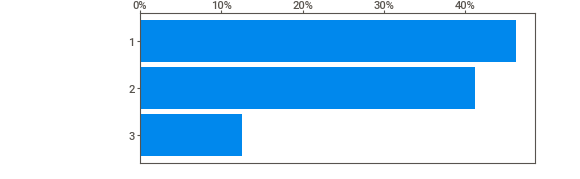
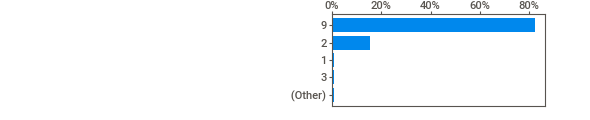
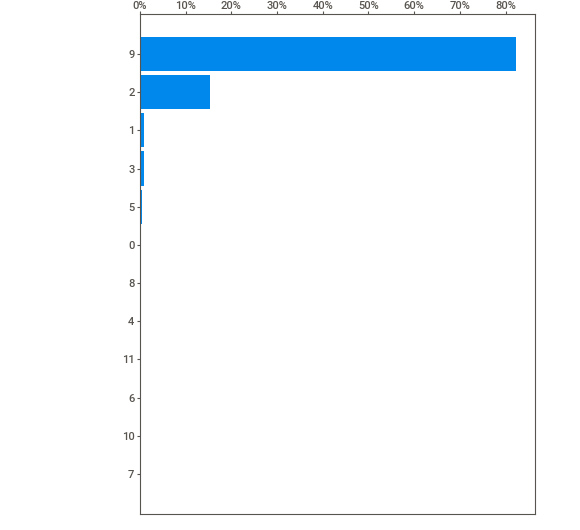
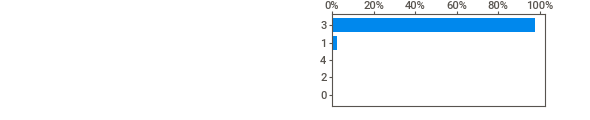
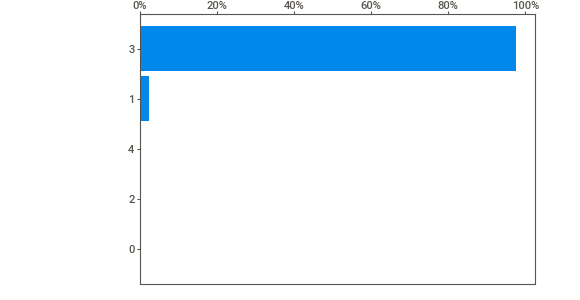
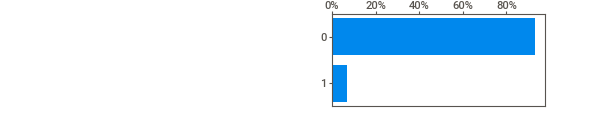
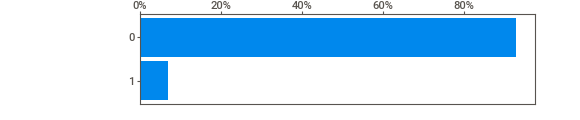
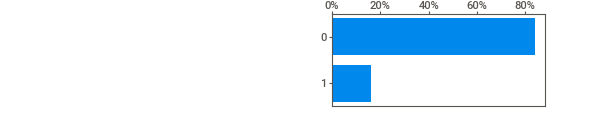
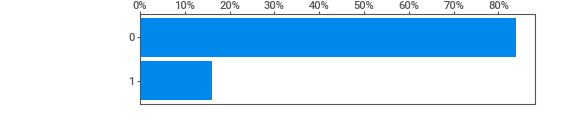
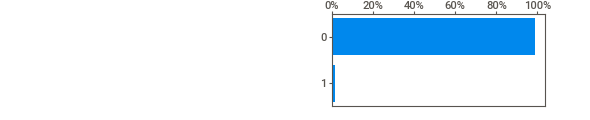
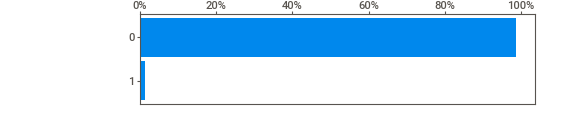
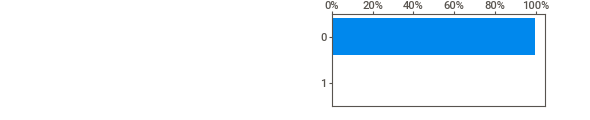
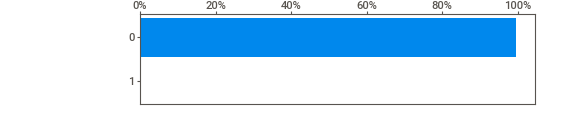
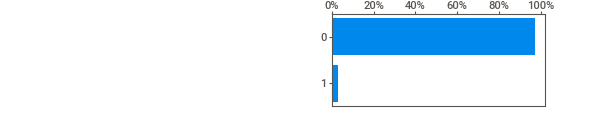
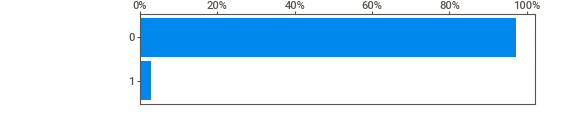
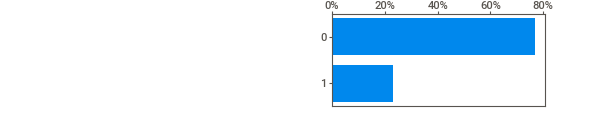
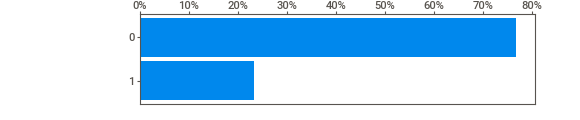
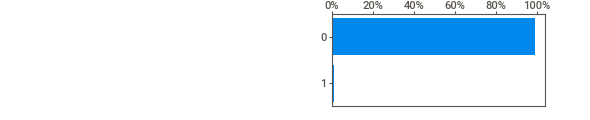
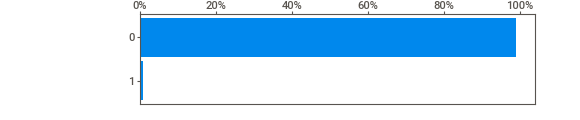
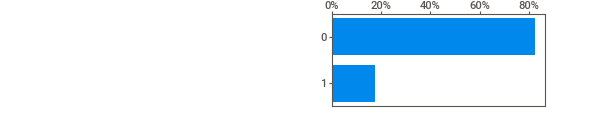
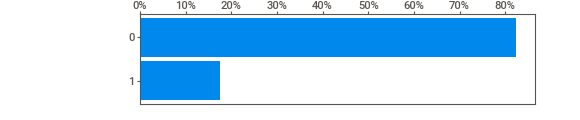
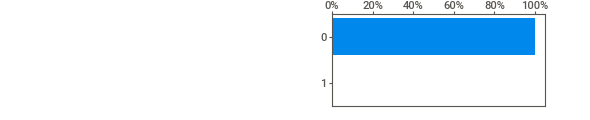
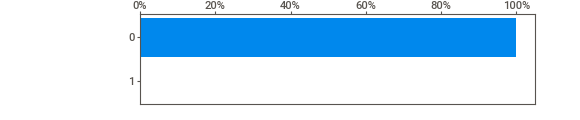
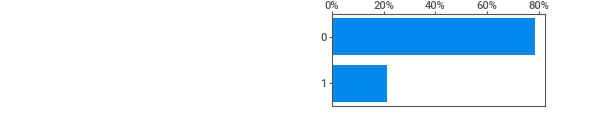
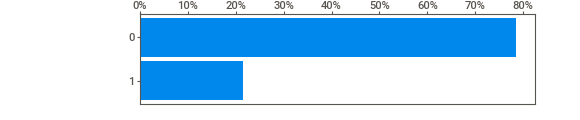
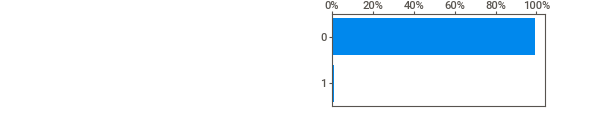
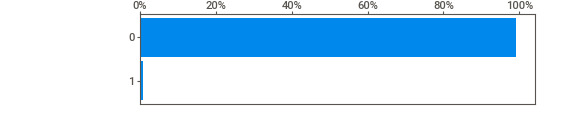
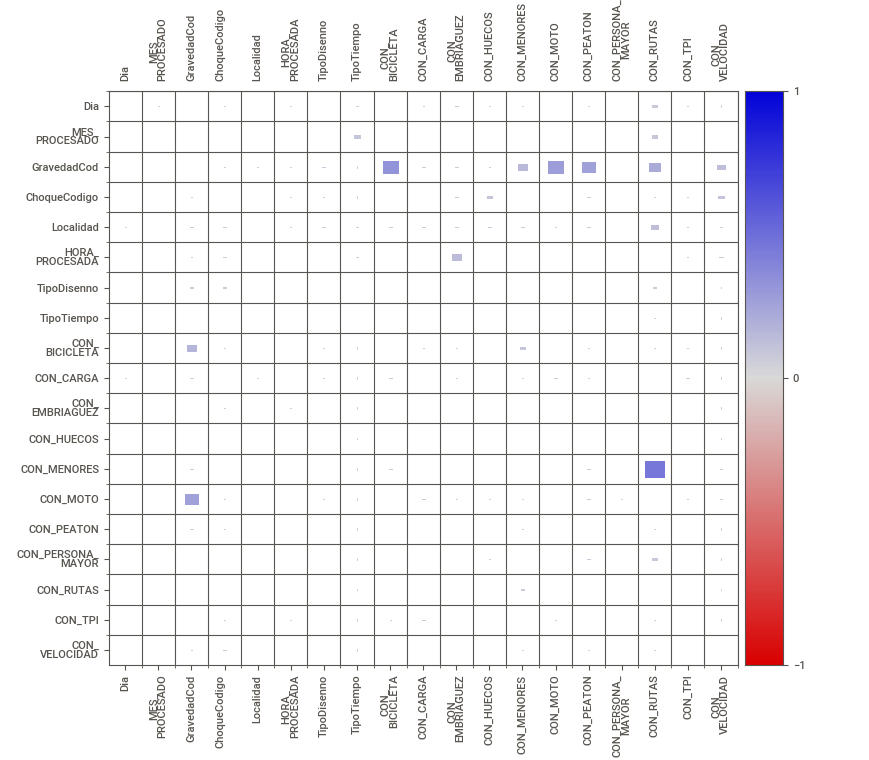
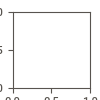

In [34]:

import sweetviz as sv
reporteSweetviz=sv.analyze(dfAccidentes)
reporteSweetviz.show_notebook()

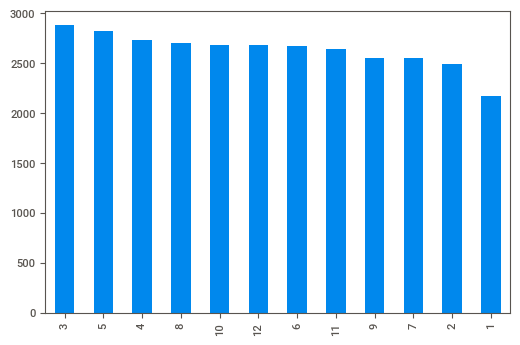

In [35]:
from pandas.core.algorithms import value_counts
dfAccidentes['MES_PROCESADO'].value_counts().plot(kind = 'bar')



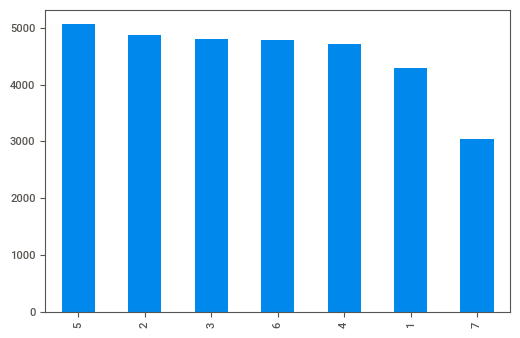

In [36]:
dfAccidentes['Dia'].value_counts().plot(kind = 'bar')

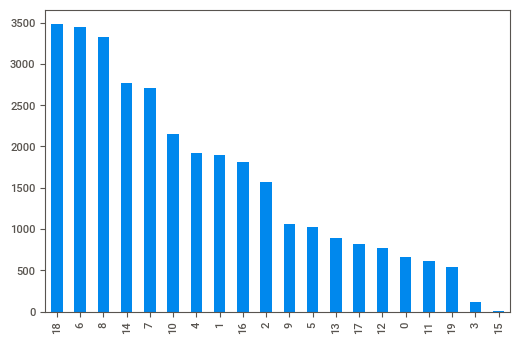

In [37]:
dfAccidentes['Localidad'].value_counts().plot(kind = 'bar')


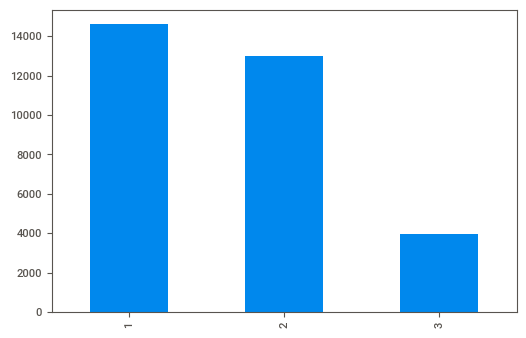

In [38]:
dfAccidentes['HORA_PROCESADA'].value_counts().plot(kind = 'bar')


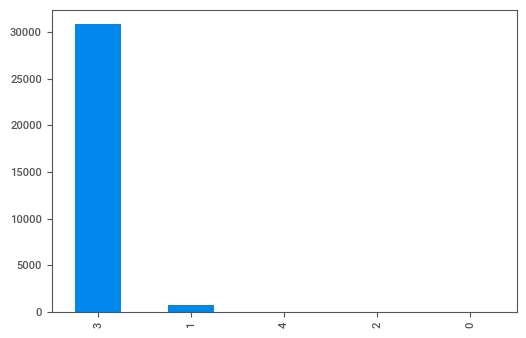

In [39]:
dfAccidentes['TipoTiempo'].value_counts().plot(kind = 'bar')


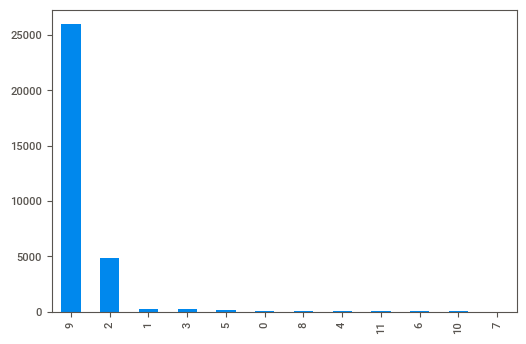

In [40]:
dfAccidentes['TipoDisenno'].value_counts().plot(kind = 'bar')

In [41]:
print("CON_BICICLETA")
print( dfAccidentes['CON_BICICLETA'].value_counts())
print("CON_CARGA")
print( dfAccidentes['CON_CARGA'].value_counts())
print("CON_EMBRIAGUEZ")
print( dfAccidentes['CON_EMBRIAGUEZ'].value_counts())
print("CON_HUECOS")
print( dfAccidentes['CON_HUECOS'].value_counts())
print("CON_MENORES")
print( dfAccidentes['CON_MENORES'].value_counts())
print("CON_MOTO")
print( dfAccidentes['CON_MOTO'].value_counts())
print("CON_PEATON")
print( dfAccidentes['CON_PEATON'].value_counts())
print("CON_PERSONA_MAYOR")
print( dfAccidentes['CON_PERSONA_MAYOR'].value_counts())
print("CON_RUTAS")
print( dfAccidentes['CON_RUTAS'].value_counts())
print("CON_TPI")
print( dfAccidentes['CON_TPI'].value_counts())
print("CON_VELOCIDAD")
print( dfAccidentes['CON_VELOCIDAD'].value_counts())

CON_BICICLETA
0    29378
1     2207
Name: CON_BICICLETA, dtype: int64
CON_CARGA
0    26521
1     5064
Name: CON_CARGA, dtype: int64
CON_EMBRIAGUEZ
0    31183
1      402
Name: CON_EMBRIAGUEZ, dtype: int64
CON_HUECOS
0    31460
1      125
Name: CON_HUECOS, dtype: int64
CON_MENORES
0    30719
1      866
Name: CON_MENORES, dtype: int64
CON_MOTO
0    24263
1     7322
Name: CON_MOTO, dtype: int64
CON_PEATON
0    31300
1      285
Name: CON_PEATON, dtype: int64
CON_PERSONA_MAYOR
0    26028
1     5557
Name: CON_PERSONA_MAYOR, dtype: int64
CON_RUTAS
0    31566
1       19
Name: CON_RUTAS, dtype: int64
CON_TPI
0    24811
1     6774
Name: CON_TPI, dtype: int64
CON_VELOCIDAD
0    31332
1      253
Name: CON_VELOCIDAD, dtype: int64


Si realizamos la validacion de la cantidad de datos sobre nuestra variable objetivo, encontramos que presenta un desbalanceo respecto a un tipo de gravedad(Gravedad Tipo 1), por lo cual procedemos con la eliminacion de los registros y sera un analisis binomial:

In [42]:
print( dfAccidentes['GravedadCod'].value_counts())

3    23703
2     7669
1      213
Name: GravedadCod, dtype: int64


In [43]:
dfAccidentes.drop(dfAccidentes.loc[dfAccidentes["GravedadCod"] == 1].index, inplace=True)

In [44]:
print( dfAccidentes['GravedadCod'].value_counts())

3    23703
2     7669
1        0
Name: GravedadCod, dtype: int64


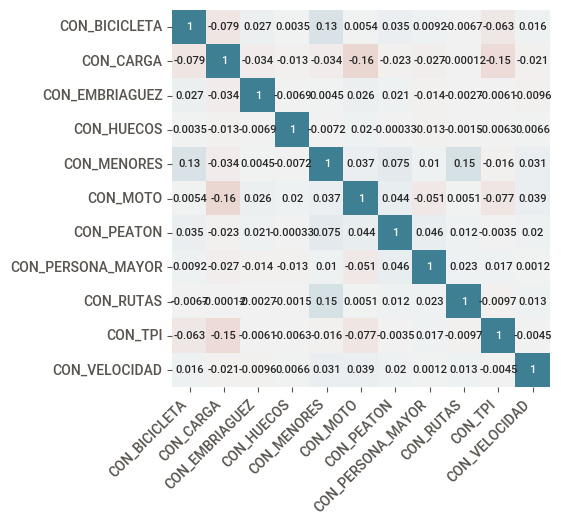

In [49]:
corr_matrix = dfAccidentes.corr(method='spearman')
corr_matrix

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(corr_matrix, annot = True, cbar= False, annot_kws = {"size": 8}, vmin = -1, vmax = 1, center = 0, cmap= sns.diverging_palette(20, 220, n=200), square = True, ax= ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

ax.tick_params(labelsize = 10)

#Modeling
Teniendo en cuenta el analisis previo de dato: Analisis de datos atipicos y faltantes, correlaciones e independencia entre variables, se toma la decision de usar las variables para entrenar y evaluar el modelo:

In [50]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X = dfAccidentes[['Dia', 'Localidad', 'MES_PROCESADO','HORA_PROCESADA', 'TipoDisenno', 'CON_EMBRIAGUEZ', 'CON_VELOCIDAD', 'CON_BICICLETA', 'CON_CARGA', 'CON_MOTO', 'CON_PERSONA_MAYOR']].to_numpy()
y=lb.fit_transform(dfAccidentes['GravedadCod'])

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=2294) 

In [52]:
!pip install xgboost

Se valido los mejores modelos para clasificacion para realizar el entrenamiento y validar su comportamiento, por lo cual ingresaran en nuestra validacion:
- XGBoost
- DecisionTreeClassifier
- Naive_bayes
- LinearDiscriminantAnalysis
- RandomForestClassifier


Teniendo en cuenta la cantidad de variables del modelo, hemos definido la profundidad de la mayoria de los modelos en 12.

In [53]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
models = [xgb.XGBClassifier(max_depth=12),
            DecisionTreeClassifier(max_depth=12),
            sklearn.naive_bayes.GaussianNB(),
            LDA(n_components=1),
            RandomForestClassifier(max_depth=12)]

for model in models:
  model.fit(X_train, y_train)
  print(model.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 12, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
{'priors': None, 'var_smoothing': 1e-09}
{'covariance_estimator': None, 'n_components': 1, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1

In [54]:
TipoGravedad= dfAccidentes['GravedadCod'].unique()
TipoGravedad

[3, 2]
Categories (3, int64): [1, 2, 3]

Con el fin de contrastar el desempeño del modelo se realizo la validacion cruzada para ver cual modelo presenta la mejor precision. Elegimos esta medición ya que queremos que el modelo clasifique correctamente la gravedad de los accidentes:

In [55]:
from sklearn.model_selection import cross_val_score
for model in models:
    plt.figure()
    print("****************************************************************************")
    print(model)
    print("****************************************************************************")
    scores= cross_val_score(model,X_train, y_train.ravel(), cv=5, scoring='precision')
    print(scores)
    print("Mean------------------------------------------------------------------------")
    print(scores.mean())
    print("Desviación------------------------------------------------------------------")
    print(scores.std())
#cross_val_score(clf, X, y, cv=5, scoring='recall_macro')

****************************************************************************
XGBClassifier(max_depth=12)
****************************************************************************
[0.89305761 0.89710231 0.89323843 0.89710231 0.8966967 ]
Mean------------------------------------------------------------------------
0.895439470121147
Desviación------------------------------------------------------------------
0.0018776846351815414
****************************************************************************
DecisionTreeClassifier(max_depth=12)
****************************************************************************
[0.89481481 0.90192539 0.9001218  0.91044323 0.90451336]
Mean------------------------------------------------------------------------
0.9023637189107685
Desviación------------------------------------------------------------------
0.005140111146314459
****************************************************************************
GaussianNB()
***********************************

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Realizando la validacion los modelos se encuentran sobreajustado y se identifica un desbalanceo en la data, por lo cual vamos a balancear los datos:

In [58]:
print( dfAccidentes['GravedadCod'].value_counts())

3    23703
2     7669
1        0
Name: GravedadCod, dtype: int64


In [57]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1: 16557, 0: 16557})
Testing target statistics: Counter({1: 7146, 0: 2266})


Entrenamos nuevamente el modelo con los datos balancelados:

In [65]:
models = [xgb.XGBClassifier(max_depth=12),
            DecisionTreeClassifier(max_depth=12),
            sklearn.naive_bayes.GaussianNB(),
            LDA(n_components=1),
            RandomForestClassifier(max_depth=15)]

for model in models:
  model.fit(X_res, y_res)
  print(model.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 12, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
{'priors': None, 'var_smoothing': 1e-09}
{'covariance_estimator': None, 'n_components': 1, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1

Realizamos la validacion cruzada para evaluar los modelos:

In [66]:
for model in models:
    plt.figure()
    print("***********************************************************************")
    print(model)
    print("***********************************************************************")
    scores= cross_val_score(model,X_res, y_res.ravel(), cv=5, scoring='precision')
    print(scores)
    print("Mean-------------------------------------------------------------------")
    print(scores.mean())
    print("Desviación-------------------------------------------------------------")
    print(scores.std())

***********************************************************************
XGBClassifier(max_depth=12)
***********************************************************************
[0.874128   0.87969466 0.88833593 0.89485112 0.89384422]
Mean-------------------------------------------------------------------
0.8861707829432826
Desviación-------------------------------------------------------------
0.00807324766700075
***********************************************************************
DecisionTreeClassifier(max_depth=12)
***********************************************************************
[0.85327381 0.84829443 0.85791529 0.85982702 0.86660448]
Mean-------------------------------------------------------------------
0.8571830064123105
Desviación-------------------------------------------------------------
0.006173810833340079
***********************************************************************
GaussianNB()
***********************************************************************
[0.798586

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Realizamos la evaluacion del modelo y encontramos que aun es posible un sobreajuste:

In [67]:
    dfAccidentes= dfAccidentes.astype('string')
    print("----------------------------------------------------------------")
    print(models[2])
    print(classification_report(y_test, model.predict(X_test), target_names='Gravedad Tipo ' + TipoGravedad.astype('string')))

    dfAccidentes= dfAccidentes.astype('string')
    print("----------------------------------------------------------------")
    print(models[3])
    print(classification_report(y_test, model.predict(X_test), target_names='Gravedad Tipo ' + TipoGravedad.astype('string')))

----------------------------------------------------------------
GaussianNB()
                 precision    recall  f1-score   support

Gravedad Tipo 3       0.68      0.80      0.74      2266
Gravedad Tipo 2       0.93      0.88      0.91      7146

       accuracy                           0.86      9412
      macro avg       0.81      0.84      0.82      9412
   weighted avg       0.87      0.86      0.87      9412

----------------------------------------------------------------
LinearDiscriminantAnalysis(n_components=1)
                 precision    recall  f1-score   support

Gravedad Tipo 3       0.68      0.80      0.74      2266
Gravedad Tipo 2       0.93      0.88      0.91      7146

       accuracy                           0.86      9412
      macro avg       0.81      0.84      0.82      9412
   weighted avg       0.87      0.86      0.87      9412



Teniendo en cuenta el sobreajuste del modelo se procede a optimizar y/o mejorar los hyperparametros iniciales de los modelos:

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
nb_classifier = sklearn.naive_bayes.GaussianNB()

models = [xgb.XGBClassifier(max_depth=7, learning_rate=0.001),
            DecisionTreeClassifier(max_depth=7),
            sklearn.naive_bayes.GaussianNB(),
            LDA(n_components=1),
            RandomForestClassifier(max_depth=7)]

for model in models:
  model.fit(X_res, y_res)

TipoGravedad= dfAccidentes['GravedadCod'].unique()
for model in models:
    plt.figure()
    print("***************************************************************************")
    print(model)
    print("***************************************************************************")
    scores= cross_val_score(model,X_res, y_res.ravel(), cv=5, scoring='precision')
    print(scores)
    print("Mean-----------------------------------------------------------------------")
    print(scores.mean())
    print("Desviación-----------------------------------------------------------------")
    print(scores.std())

***************************************************************************
XGBClassifier(learning_rate=0.001, max_depth=7)
***************************************************************************
[0.8326659  0.83621684 0.83294997 0.84034833 0.83599884]
Mean-----------------------------------------------------------------------
0.8356359765201204
Desviación-----------------------------------------------------------------
0.002782492024368723
***************************************************************************
DecisionTreeClassifier(max_depth=7)
***************************************************************************
[0.83295129 0.83857809 0.83386122 0.84094853 0.83648531]
Mean-----------------------------------------------------------------------
0.8365648850353959
Desviación-----------------------------------------------------------------
0.0029544382384174062
***************************************************************************
GaussianNB()
************************

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Los modelos que menos sobreajuste presetan son GaussianNB y LinearDiscriminantAnalysis, para eligir entre estos dos mostramo classification_report para compara los datos predichos con los datos de pruebas:

In [70]:
dfAccidentes= dfAccidentes.astype('string')
print("----------------------------------------------------------------")
print(models[2])
print(classification_report(y_test, model.predict(X_test), target_names='Gravedad Tipo ' + TipoGravedad.astype('string')))

----------------------------------------------------------------
GaussianNB()
                 precision    recall  f1-score   support

Gravedad Tipo 3       0.70      0.81      0.75      2266
Gravedad Tipo 2       0.94      0.89      0.91      7146

       accuracy                           0.87      9412
      macro avg       0.82      0.85      0.83      9412
   weighted avg       0.88      0.87      0.87      9412



In [71]:
dfAccidentes= dfAccidentes.astype('string')
print("----------------------------------------------------------------")
print(models[3])
print(classification_report(y_test, model.predict(X_test), target_names='Gravedad Tipo ' + TipoGravedad.astype('string')))

----------------------------------------------------------------
LinearDiscriminantAnalysis(n_components=1)
                 precision    recall  f1-score   support

Gravedad Tipo 3       0.70      0.81      0.75      2266
Gravedad Tipo 2       0.94      0.89      0.91      7146

       accuracy                           0.87      9412
      macro avg       0.82      0.85      0.83      9412
   weighted avg       0.88      0.87      0.87      9412



Los modelos tienen mediciones muy similares pero GaussianNB tiende a requerir mas recursos maquina, por tanto elegimos LinearDiscriminantAnalysis.

Para validar el poder prediccion del modelo vamos a probarlo con los datos de prueba, con la medicion de la precision macro y la matriz de confusión:



----------------------------------------------------------------
LinearDiscriminantAnalysis(n_components=1)
----------------------------------------------------------------
precision_score
0.8187601098127401
confusion_matrix
----------------------------------------------------------------
LinearDiscriminantAnalysis(n_components=1)
----------------------------------------------------------------


<Figure size 600x400 with 0 Axes>

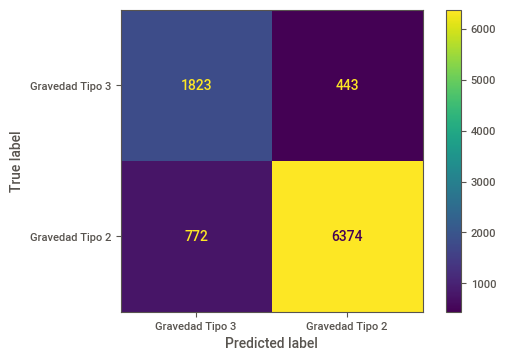

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

best=3
clf=models[best].fit(X_test, y_test)

plt.figure()
print("----------------------------------------------------------------")
print(clf)
print("----------------------------------------------------------------")
print('precision_score')
print(precision_score(y_test, clf.predict(X_test), average='macro'))


 
print('confusion_matrix')
print("----------------------------------------------------------------")
print(clf)
print("----------------------------------------------------------------")
matrizC= confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=matrizC,display_labels=('Gravedad Tipo ' + TipoGravedad.astype('string') ))
disp.plot() 

Teniendo en cuenta los resultados de los modelos, encontramos que el modelo LinearDiscriminantAnalysis es el que mejor precisión tiene respecto a la clasificacion de los dos tipos de gravedad, obteniendo una precisión de 0.8187.

Es importante tener en cuenta que el modelo puede estar un poco sobreajustado dada la dispersion de los datos.